In [1]:
import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [3]:
race = ff1.get_session(2021, 'Zandvoort', 'R')
race.load()

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '10', '16', '14', '55', '11', '31', '4', '3', '18', '5', '99', '88', '6', '63', '47', '22', '9']


In [4]:
laps_bot = race.laps.pick_driver('BOT')
laps_ham = race.laps.pick_driver('HAM')

In [5]:
fastest_bot = laps_bot.pick_fastest()
fastest_ham = laps_ham.pick_fastest()

In [6]:
telemetry_bot = fastest_bot.get_car_data().add_distance()
telemetry_ham = fastest_ham.get_car_data().add_distance()

In [7]:
telemetry_ham.head()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2021-09-05 14:32:24.115,10418,290,8,100,False,0,car,0 days 00:00:00.219000,0 days 02:31:24.106000,17.641667
1,2021-09-05 14:32:24.355,10445,290,8,100,False,0,car,0 days 00:00:00.459000,0 days 02:31:24.346000,36.975000
2,2021-09-05 14:32:24.595,10478,291,8,100,False,0,car,0 days 00:00:00.699000,0 days 02:31:24.586000,56.375000
3,2021-09-05 14:32:24.835,10475,291,8,100,False,0,car,0 days 00:00:00.939000,0 days 02:31:24.826000,75.775000
4,2021-09-05 14:32:25.075,10439,292,8,100,False,0,car,0 days 00:00:01.179000,0 days 02:31:25.066000,95.241667


In [8]:
telemetry_ham.dtypes

Date            datetime64[ns]
RPM                      int64
Speed                    int64
nGear                    int64
Throttle                 int64
Brake                     bool
DRS                      int64
Source                  object
Time           timedelta64[ns]
SessionTime    timedelta64[ns]
Distance               float64
dtype: object

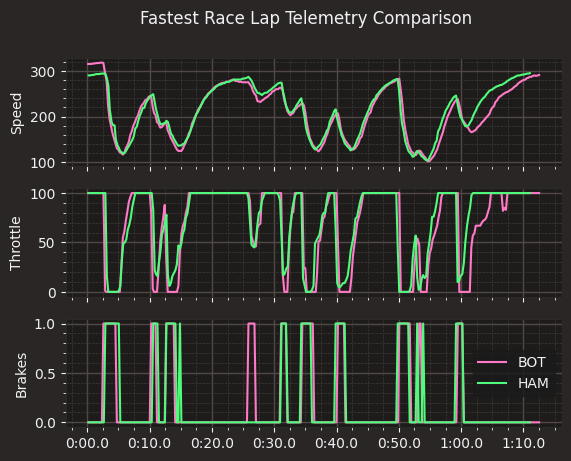

In [9]:
fig, ax = plt.subplots(3)
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(telemetry_bot['Time'], telemetry_bot['Speed'], label='BOT')
ax[0].plot(telemetry_ham['Time'], telemetry_ham['Speed'], label='HAM')
ax[0].set(ylabel='Speed')

ax[1].plot(telemetry_bot['Time'], telemetry_bot['Throttle'], label='BOT')
ax[1].plot(telemetry_ham['Time'], telemetry_ham['Throttle'], label='HAM')
ax[1].set(ylabel='Throttle')

ax[2].plot(telemetry_bot['Time'], telemetry_bot['Brake'], label='BOT')
ax[2].plot(telemetry_ham['Time'], telemetry_ham['Brake'], label='HAM')
ax[2].set(ylabel='Brakes')
ax[2].legend(loc="center right")

for a in ax.flat:
    a.label_outer()

plt.show()

In [10]:
print('Bottas:', telemetry_bot['Time'].max())
print('Hamiton:', telemetry_ham['Time'].max())

Bottas: 0 days 00:01:12.505000
Hamiton: 0 days 00:01:11.020000
